In [21]:
import pandas as pd

df = pd.read_csv(r'C:\Users\LENOVO\Downloads\game sales - game sales.csv')
print(df)

     GameID         Platform    SalesRegion  UnitsSold  Price
0         1             Xbox  North America     861216  45.39
1         2      PlayStation  North America     444626  53.55
2         3      PlayStation  North America     569637  34.20
3         4      PlayStation  South America     977779  43.90
4         5               PC  South America     473349  21.61
..      ...              ...            ...        ...    ...
145     146             Xbox  South America     795629  24.76
146     147               PC  North America     548237  40.10
147     148      PlayStation           Asia     120934  55.72
148     149             Xbox           Asia     161486  52.82
149     150  Nintendo Switch  North America     806262  28.67

[150 rows x 5 columns]


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GameID       150 non-null    int64  
 1   Platform     150 non-null    object 
 2   SalesRegion  150 non-null    object 
 3   UnitsSold    150 non-null    int64  
 4   Price        150 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.0+ KB


In [23]:
df.isnull().sum()

GameID         0
Platform       0
SalesRegion    0
UnitsSold      0
Price          0
dtype: int64

In [24]:
# dropping gameid
df = df.drop('GameID', axis=1)

In [25]:
#changing column name

df = df.rename({'SalesRegion': 'Region', 'UnitsSold':'Units'}, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  150 non-null    object 
 1   Region    150 non-null    object 
 2   Units     150 non-null    int64  
 3   Price     150 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.8+ KB


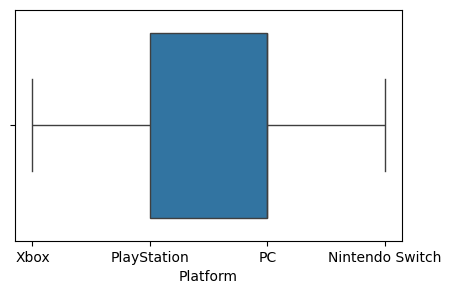

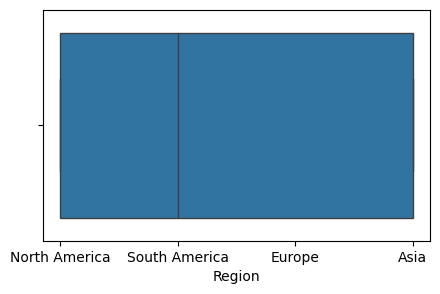

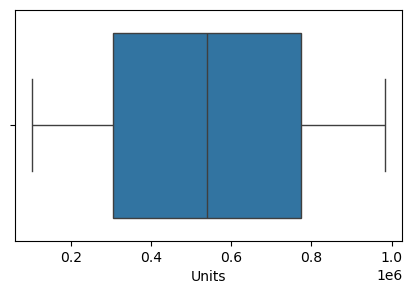

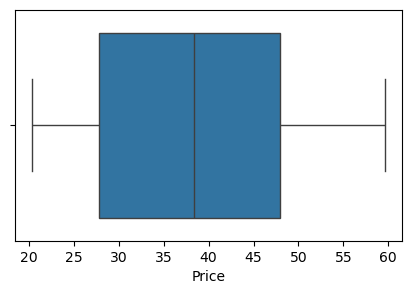

In [26]:
# detecting outliers
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[i])
    plt.show()

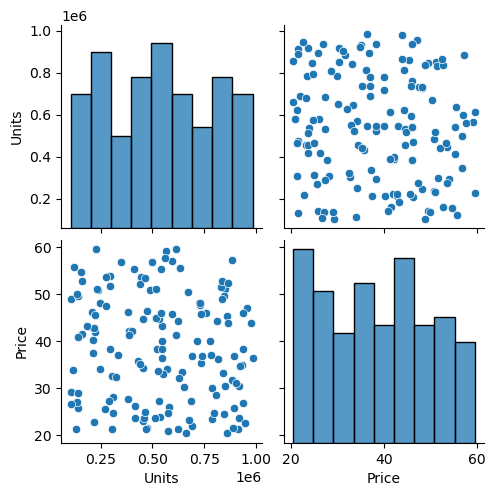

In [34]:
# seeing pre-model clusters
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[['Units', 'Price']])
plt.show()

How to read this pairplot:

Top-left: Units vs Units → shows a histogram (distribution of Units).

Bottom-right: Price vs Price → shows a histogram (distribution of Price).

Top-right: Units (x-axis) vs Price (y-axis).

Bottom-left: Price (x-axis) vs Units (y-axis).

If dots group together → possible natural clusters.

If dots are scattered → no visible clusters.

In [35]:
# converting my data into dummy data/ one-hot encoding
df = pd.get_dummies(df, drop_first=True).astype(float)
print(df.shape[1])

8


In [36]:
df.head(3)

,Units,Price,Platform_PC,Platform_PlayStation,Platform_Xbox,Region_Europe,Region_North America,Region_South America
0,861216.0,45.39,0.0,0.0,1.0,0.0,1.0,0.0
1,444626.0,53.55,0.0,1.0,0.0,0.0,1.0,0.0
2,569637.0,34.20,0.0,1.0,0.0,0.0,1.0,0.0


In [37]:
# scaling the data, it will make the numeric columns equal in size so that the big coolumn units doesnt dominate price
## scaler(z) = x - mean / std ##

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_standard = scaler.fit_transform(df)
print(x_standard)

[[ 1.26532015  0.59940722 -0.65465367 ... -0.51039612  1.63050194
  -0.55167728]
 [-0.35914187  1.32353048 -0.65465367 ... -0.51039612  1.63050194
  -0.55167728]
 [ 0.12832932 -0.39360004 -0.65465367 ... -0.51039612  1.63050194
  -0.55167728]
 ...
 [-1.62135499  1.51609757 -0.65465367 ... -0.51039612 -0.61330807
  -0.55167728]
 [-1.46322545  1.25874985 -0.65465367 ... -0.51039612 -0.61330807
  -0.55167728]
 [ 1.05103108 -0.88433553 -0.65465367 ... -0.51039612  1.63050194
  -0.55167728]]


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

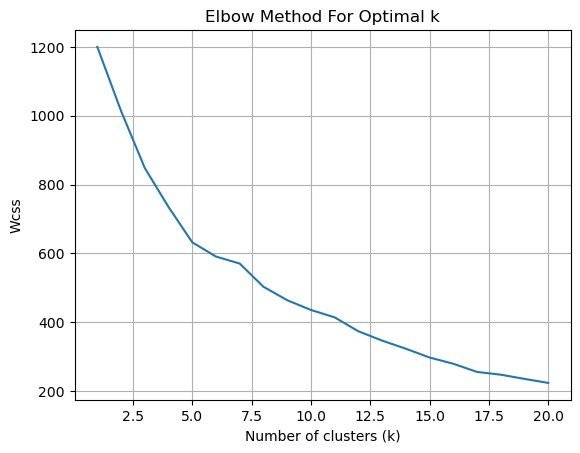

In [43]:
from sklearn.cluster import KMeans
# wcss - within clusters sum of square
wcss = []
k = range(1, 21)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_standard)
    wcss.append(kmeans.inertia_)

plt.plot(k, wcss)
plt.xlabel('Number of clusters (k)')
plt.grid(True)
plt.ylabel('Wcss')
plt.title('Elbow Method For Optimal k')
plt.show()

It’s called the Elbow Method, and it uses the WCSS (Within Cluster Sum of Squares) to determine the optimal number of clusters. In the diagram,
the curve has bend in point 5 This elbow curve telling to keep 5 number of clusters

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

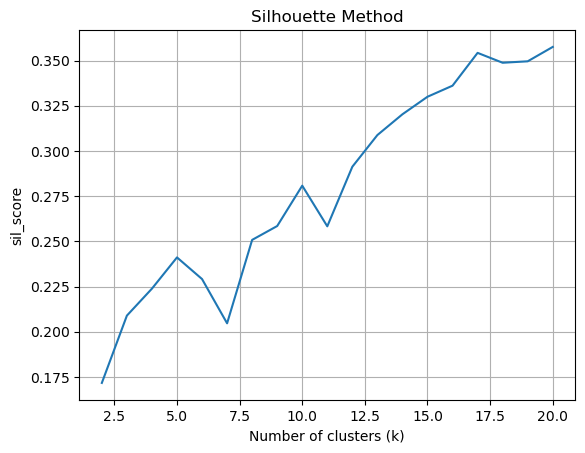

In [44]:
from sklearn.metrics import silhouette_score
sil_score = []
k = range(2,21)

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_standard)
    sil_score.append(silhouette_score(x_standard, kmeans.labels_))


plt.plot(k, sil_score)
plt.xlabel('Number of clusters (k)')
plt.grid(True)
plt.ylabel('sil_score')
plt.title('Silhouette Method')
plt.show()

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_standard)
    print(f'Silhouette Score at k={i}:', silhouette_score(x_standard, kmeans.labels_))

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

Silhouette Score at k=2: 0.17165477384492003
Silhouette Score at k=3: 0.20889491433518526
Silhouette Score at k=4: 0.22382510996189017
Silhouette Score at k=5: 0.2410988802003539
Silhouette Score at k=6: 0.22912351064444209
Silhouette Score at k=7: 0.20463170575844686
Silhouette Score at k=8: 0.25079437689480266
Silhouette Score at k=9: 0.25845956181552593
Silhouette Score at k=10: 0.2807907760815552
Silhouette Score at k=11: 0.25830027574709763
Silhouette Score at k=12: 0.2912777646598945
Silhouette Score at k=13: 0.3088008754237913
Silhouette Score at k=14: 0.3202951029780226
Silhouette Score at k=15: 0.3299873405630823
Silhouette Score at k=16: 0.33611828679631345
Silhouette Score at k=17: 0.3542692550812336
Silhouette Score at k=18: 0.3487978720393083
Silhouette Score at k=19: 0.34959948011787495
Silhouette Score at k=20: 0.3575586949114628


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette score keeps increasing up to k = 21, but after k ≈ 5, the improvement is minimal.
So, practically, k = 5 (from Elbow Method) I will choose for optimal clustering

In [48]:
# training the model with k=5

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_standard)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


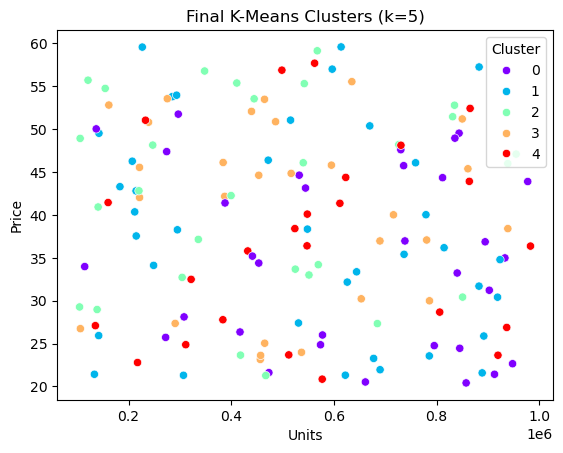

In [49]:
#plotting 

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['Units'], y=df['Price'], hue=df['Cluster'], palette='rainbow')
plt.title('Final K-Means Clusters (k=5)')
plt.show()

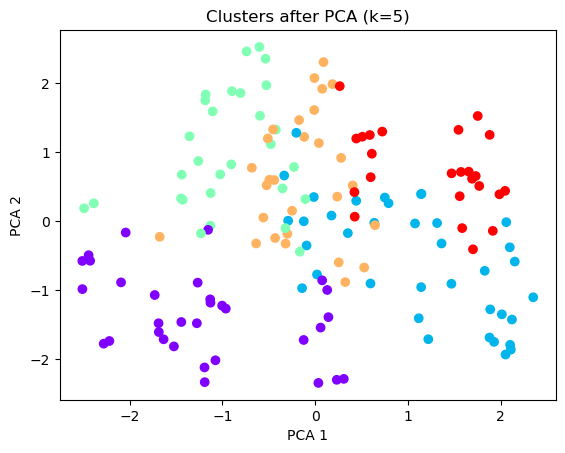

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA to see better clusters
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_standard)

# Plot clusters using PCA results
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=df['Cluster'], cmap='rainbow')
plt.title('Clusters after PCA (k=5)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [51]:
df.groupby('Cluster')[['Units', 'Price']].mean()

,Units,Price
Cluster,,
0,627257.031250,35.068438
1,529170.756757,38.199189
2,464825.758621,42.658276
3,502543.214286,40.697500
4,554432.541667,36.797083


Cluster 0 shows the highest unit sold and average price, it is most demanded.
Cluster 2, on the other hand, represents expensive games with lower unit sales.
Overall, the clustering reveals different market segments based on sales performance and pricing.

In [58]:
import os

os.getcwd()
os.chdir(r'C:\Users\LENOVO\Desktop\Machine learning\Unsupervised ML\K-means clustering')


'C:\\Users\\LENOVO'

In [59]:
os.chdir(r'C:\Users\LENOVO\Desktop\Machine learning\Unsupervised ML\K-means clustering')
os.getcwd()

'C:\\Users\\LENOVO\\Desktop\\Machine learning\\Unsupervised ML\\K-means clustering'